In [1]:
import numpy as np

**方程**


$
\left\{\begin{aligned}
&\frac{{\rm d}y}{{\rm d}x}=f(x,y)=y-\frac{2x}{y}\\
&y(0)=1
\end{aligned}\right.\quad 
$

In [3]:
def f(x,y):
    return y-2*x/y

**欧拉法**


$
\left\{\begin{aligned}
&y_{n+1}=y_n+hf(x_n,y_n)\\ 
&y(x_0)=y_0
\end{aligned}\right.\quad n=0,1,2,\cdots
$

In [2]:
def euler(fun,y0,a,b,h):
    n = int(np.ceil((b-a)/h))
    y = np.zeros(n+1)
    x = np.arange(a,b+0.1,0.1)
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i]+h*fun(x[i],y[i])
    out = {'X':x,'Y':y}
    return out

In [4]:
# test
a = euler(f,1,0,1,0.1)
a

{'X': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'Y': array([1.        , 1.1       , 1.19181818, 1.27743783, 1.3582126 ,
        1.43513292, 1.50896625, 1.58033824, 1.64978343, 1.71777935,
        1.78477083])}

**隐式欧拉格式：**<br>
欧拉格式是用差商的值来近似点$(x_n,y_n)$处的导数值，若用差商的值来近似点$(x_{n+1},y_{n+1})$处的导数值，则可以得到隐式欧拉格式
$$
\left\{\begin{aligned}
y_{n+1}&=y_n+hf(x_{n+1},y_{n+1})\\
y(x_0)&=y_0
\end{aligned}\right.\quad n=0,1,2,\cdots
$$
隐式欧拉格式只有在$f(x,y)$容易将两个参数分离的情况，才比较容易使用.

In [6]:
def hide_euler(fun,y0,a,b,h):
    n = int(np.ceil((b-a)/h))+1
    eu = euler(fun,y0,a,b,h)
    y = eu['Y']
    x = eu['X']
    y_old = np.zeros(n)
    times = 0
    while(np.linalg.norm(y_old-y)>0.1 and times<500):
        y_old = y.copy()
        for i in range(n-1):
            y[i+1] = y[i]+h*(fun(x[i+1],y[i+1]))
        #print(np.linalg.norm(y_old-y))
        times+=1
    out = {'X':x,'Y':y}
    return out

In [7]:
# test
ha = hide_euler(f,1,0,1,0.1)
ha

{'X': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'Y': array([1.        , 1.09181818, 1.17743783, 1.2582126 , 1.33513292,
        1.40896625, 1.48033824, 1.54978343, 1.61777935, 1.68477083,
        1.75118871])}

**梯形方法：**<br>
为了得到更加准确的估计，可以考虑将欧拉格式和隐式欧拉格式取平均值，得到
$$
y_{n+1}=y_n+\frac{h}{2}(f(x_n,y_n)+f(x_{n+1},y_{n+1}))	\tag{2-1}
$$
上述式子称为梯形公式，为了计算$y_{n+1}$常用以下迭代式
$$
\left\{\begin{aligned}
y_{n+1}^{(0)}&=y_n+hf(x_n,y_n)\\
y_{n+1}^{(k+1)}&=y_n+\frac{h}{2}(f(x_n,y_n)+f(x_{n+1},y_{n+1}^{(k)}))
\end{aligned}\right.\quad k=0,1,2,\cdots\tag{2-2}
$$
当$|y_{n+1}^{(k+1)}-y_{n+1}^{(k)}|<\varepsilon$时，取$y_{n+1}\approx y_{n+1}^{(k+1)}$.

In [11]:
def trapezoid(fun,y0,a,b,h):
    n = int(np.ceil((b-a)/h))+1
    eu = euler(fun,y0,a,b,h)
    y = eu['Y']
    x = eu['X']
    y_old = np.zeros(n)
    times = 0
    while(np.linalg.norm(y_old-y)>1 and times<100):
        y_old = y.copy()
        for i in range(n-1):
            yy = y.copy()
            y[i+1] = y[i]+(h/2)*(fun(x[i+1],y[i+1])+fun(x[i],yy[i]))
        #print(np.linalg.norm(y_old-y))
        times+=1
    out = {'X':x,'Y':y}
    return out

In [12]:
# test
at = trapezoid(f,1,0,1,0.1)
at

{'X': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'Y': array([1.        , 1.09590909, 1.18438953, 1.26711005, 1.34524979,
        1.41969469, 1.49114658, 1.56018901, 1.62733006, 1.69303203,
        1.7577335 ])}

**改进的Euler法**<br>
$$
y_{n+1}=y_n+\frac{h}{2}(f(x_n,y_n)+f(x_n,y_n+hf(x_n,y_n))),\quad n=0,1,\ldots\,.
$$

In [13]:
def euler_pro(fun,y0,a,b,h):
    n = int(np.ceil((b-a)/h))+1
    y = np.zeros(n)
    x = np.arange(a,b+0.1,0.1)
    y[0] = y0
    for i in range(n-1):
        y[i+1] = y[i]+(h/2)*(fun(x[i],y[i])+f(x[i+1],y[i]+h*f(x[i],y[i])))
    out = {'X':x,'Y':y}
    return out

In [14]:
# test
apro = euler_pro(f,1,0,1,0.1)
apro

{'X': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'Y': array([1.        , 1.09590909, 1.18409657, 1.26620136, 1.34336015,
        1.41640193, 1.4859556 , 1.55251409, 1.61647478, 1.67816636,
        1.7378674 ])}

**龙格库塔方法**<br>


**二级龙格库塔方法**<br>
$$
y_{n+1}=y_n+h{\alpha_1k_1}+h{\alpha_2k_2}\\
k_1=f(x_n,y_n)\\
k_2=f(x_n+h\lambda_2,y_n+h\mu_2k_1)\\
$$

In [15]:
def runge_kutta2(fun,y0,a,b,h,alpha1,alpha2,lambda2,mu2):
    if alpha1+alpha2!=1 or alpha2*lambda2!=1/2 or alpha2*mu2!=1/2:
        print('不满足条件')
        return 0
    n = int(np.ceil((b-a)/h))+1
    y = np.zeros(n)
    x = np.arange(a,b+0.1,0.1)
    y[0] = y0
    for i in range(n-1):
        k1=fun(x[i],y[i])
        k2=fun(x[i]+h*lambda2,y[i]+h*mu2*k1)
        y[i+1] = y[i]+h*alpha1*k1+h*alpha2*k2
    out = {'X':x,'Y':y}
    return out

In [16]:
# test
# 1 alpha1=0,alpha2=1,lambda2=mu2=1/2
ark1 = runge_kutta2(f,1,0,1,0.1,0,1,1/2,1/2)
ark1
# 1 alpha1=1/2,alpha2=1/2,lambda2=mu2=1
ark2 = runge_kutta2(f,1,0,1,0.1,1/2,1/2,1,1)
ark2

{'X': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'Y': array([1.        , 1.09590909, 1.18409657, 1.26620136, 1.34336015,
        1.41640193, 1.4859556 , 1.55251409, 1.61647478, 1.67816636,
        1.7378674 ])}

**四级龙格库塔方法**<br>
$$
y_{n+1}=y_n+\frac{h}{6}(k_1+2k_2+2k_3+k_4)\\
k_1=f(x_n,y_n)\\
k_2=f(x_n+\frac{h}{2},y_n+\frac{h}{2}k_1)\\
k_3=f(x_n+\frac{h}{2},y_n+\frac{h}{2}k_2)\\
k_4=f(x_n+h,y_n+hk_3)
$$

In [17]:
def runge_kutta4(fun,y0,a,b,h):
    n = int(np.ceil((b-a)/h))+1
    y = np.zeros(n)
    x = np.arange(a,b+0.1,0.1)
    y[0] = y0
    for i in range(n-1):
        k1=fun(x[i],y[i])
        k2=fun(x[i]+h/2,y[i]+h*k1/2)
        k3=fun(x[i]+h/2,y[i]+h*k2/2)
        k4=fun(x[i]+h,y[i]+h*k3)
        y[i+1] = y[i]+h*(k1+2*k2+2*k3+k4)/6
    out = {'X':x,'Y':y}
    return out

In [18]:
# test
ark4 = runge_kutta4(f,1,0,1,0.1)
ark4

{'X': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'Y': array([1.        , 1.09544553, 1.18321675, 1.26491223, 1.34164235,
        1.41421558, 1.48324222, 1.54919645, 1.61245535, 1.67332466,
        1.73205637])}

#### Display

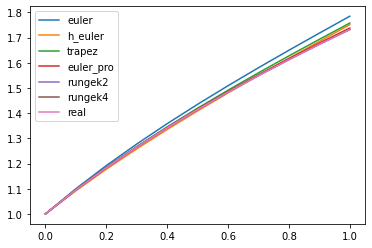

In [19]:
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
a = euler(f,1,0,1,0.1)
ha = hide_euler(f,1,0,1,0.1)
at = trapezoid(f,1,0,1,0.1)
apro = euler_pro(f,1,0,1,0.1)
ark2 = runge_kutta2(f,1,0,1,0.1,0,1,1/2,1/2)
ark4 = runge_kutta4(f,1,0,1,0.1)
# real
def real(x):
    return np.sqrt(2*x + 1)

plt.plot(a['X'],a['Y'],label='euler')
plt.plot(ha['X'],ha['Y'],label='h_euler')
plt.plot(at['X'],at['Y'],label='trapez')
plt.plot(apro['X'],apro['Y'],label='euler_pro')
plt.plot(ark2['X'],ark2['Y'],label='rungek2')
plt.plot(ark4['X'],ark4['Y'],label='rungek4')
plt.plot(np.arange(0,1+0.1,0.1),real(np.arange(0,1+0.1,0.1)),label='real')
plt.legend(loc='best')

plt.show()

In [20]:
from sympy import *

x = Symbol('x')

k = Symbol('k')

y = Function('y')

g = diff(y(x),x) - y(x)+2*x/y(x)

print(dsolve(g, y(x)))

[Eq(y(x), -sqrt(C1*exp(2*x) + 2*x + 1)), Eq(y(x), sqrt(C1*exp(2*x) + 2*x + 1))]
